In [40]:
import numpy as np, matplotlib.pyplot as plt, math
from mpl_toolkits import mplot3d
from random import randint
import random
%matplotlib notebook

In [41]:
def magnetic_force(charge,velocity,field): return charge*np.cross(velocity,field)

class particle:
    
    def __init__(self, r, v, q, m):
        self.r, self.v, self.q, self.m = np.asarray(r), np.asarray(v), q, m
        self.history = {'x':[], 'y':[], 'z':[]}
    
    def update(self, field, time_step):
        F =  magnetic_force(self.q, self.v, np.asarray(field))
        self.r = self.r + self.v * np.float64(time_step)
        self.v = self.v + F * np.float64(time_step) / self.m
        self.history['x'].append(self.r[0]), self.history['y'].append(self.r[1])
        self.history['z'].append(self.r[2])
        
    def iterate(self, external_field, elapsed_time, time_step):
        for i in range(elapsed_time): self.update(external_field, time_step)

    ### WARNING: ELAPSED_TIME MUST BE AN INTEGER. 
    ### We should be able to fix this easily with arange().
            
    def plot_trajectory(self):
        ax.plot3D(electron.history['x'], electron.history['y'], \
                  electron.history['z'], 'b-');
class random_particle:
    
    def __init__(self):
        self.r = np.asarray([0.5 - (1.0 * np.random.ranf()),0.5 - \
                            (1.0 * np.random.ranf()),0.5 - (1.0 * np.random.ranf())])
        self.v = np.asarray([1.0 - (2.0 * np.random.ranf()),1.0 - \
                            (2.0 * np.random.ranf()),1.0 - (2.0 * np.random.ranf())])
        self.q = 1 - (2 * np.random.ranf())
        self.m = 0.05 + np.random.ranf()
        self.history = {'x':[], 'y':[], 'z':[]}
        
    def update(self, field, time_step):
        F =  magnetic_force(self.q, self.v, np.asarray(field))
        self.r = self.r + self.v * np.float64(time_step)
        self.v = self.v + F * np.float64(time_step) / self.m
        self.history['x'].append(self.r[0]), self.history['y'].append(self.r[1])
        self.history['z'].append(self.r[2])
        
    def iterate(self, external_field, elapsed_time, time_step):
        for i in range(elapsed_time): self.update(external_field, time_step)

In [42]:
##################  USER PARAMETERS ###########################

external_field = [np.float64(0),np.float64(0),np.float64(5.0)]
time_step = 0.001
elapsed_time = 1000
number_of_particles = 10

###############################################################

In [43]:
randoms = []
# Populate an array with random_particles, iterate over the elapsed time.
for i in range(number_of_particles): randoms.append(random_particle())
for i in range(number_of_particles): randoms[i].iterate(external_field,elapsed_time,time_step)

<IPython.core.display.Javascript object>


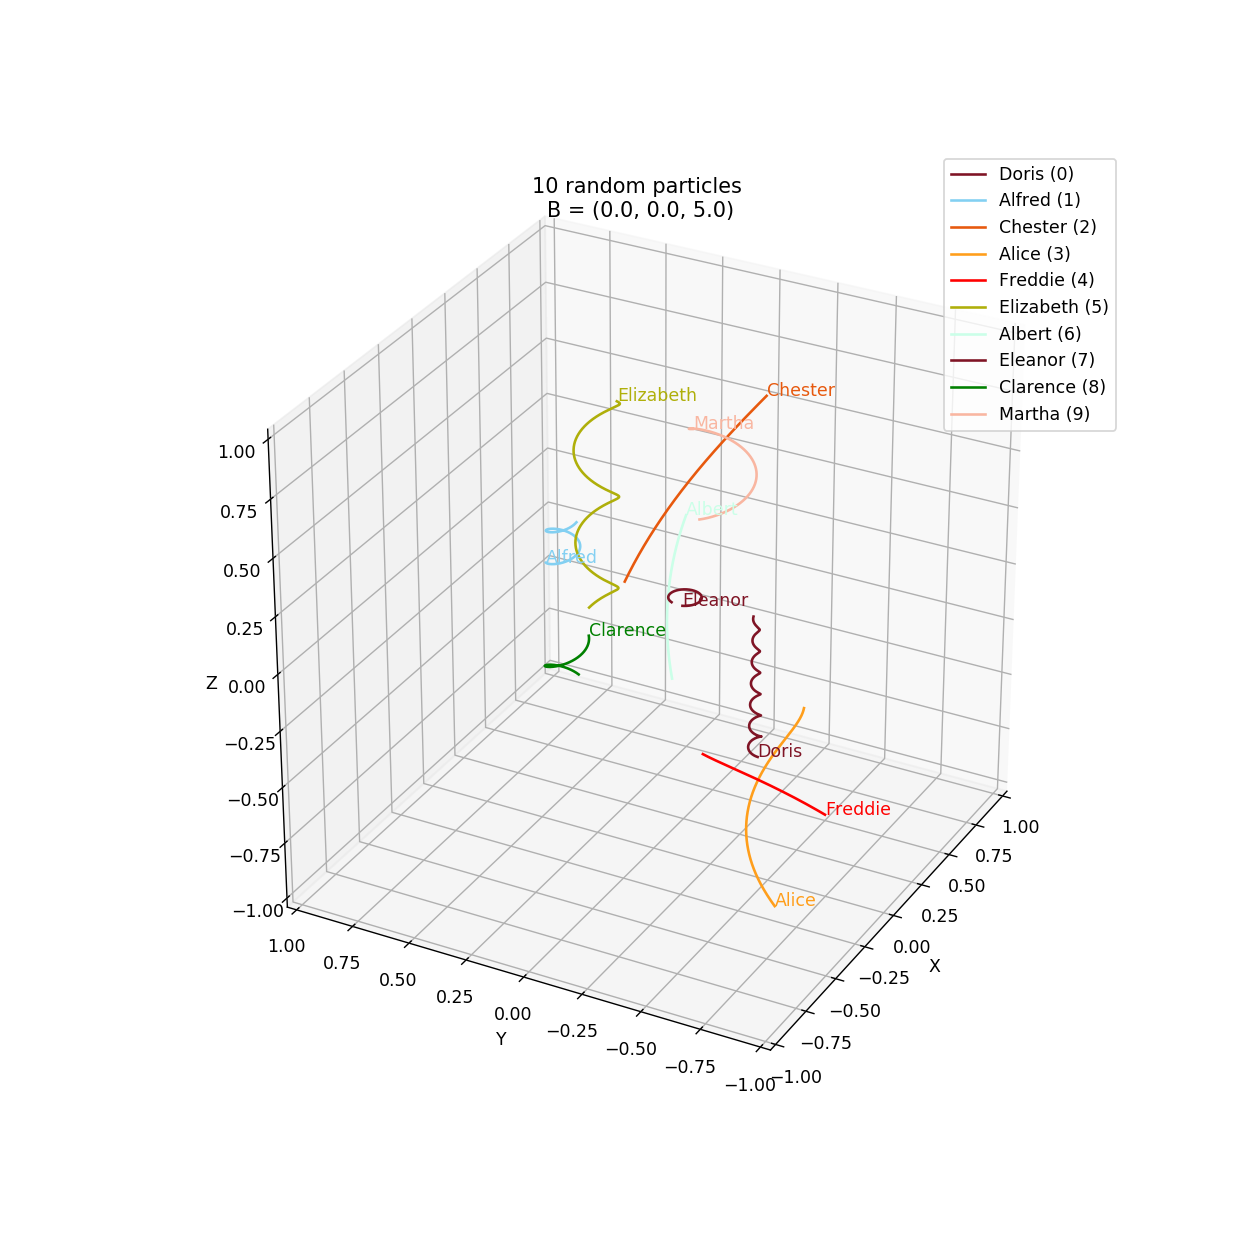

Doris v_0 = [ 0.83975044 -0.70727843 -0.60693635] q = -0.708 m = 0.088 

Alfred v_0 = [ 0.46435621  0.35683903 -0.19361735] q = 0.869 m = 0.502 

Chester v_0 = [ 0.09519678 -0.58673574  0.75056509] q = 0.170 m = 0.754 

Alice v_0 = [ 0.25095801 -0.44704054 -0.83801066] q = -0.704 m = 0.765 

Freddie v_0 = [ 0.40978056 -0.49370223 -0.50991615] q = 0.177 m = 0.918 

Elizabeth v_0 = [-1.37030044  0.03378991  0.97702923] q = 0.539 m = 0.179 

Albert v_0 = [1.12534539 0.33029991 0.10114752] q = 0.027 m = 0.444 

Eleanor v_0 = [-0.1174665   0.33589272 -0.00128317] q = 0.138 m = 0.125 

Clarence v_0 = [0.3762414  0.28648598 0.21023625] q = -0.944 m = 0.870 

Martha v_0 = [-0.43845748 -0.65257079  0.37856538] q = -0.775 m = 0.648 



In [44]:
colors = ['#b87f86', '#ff8d00', '#cbffe8','#ff00e7',
         '#afaf0a', '#003366', '#83d0f2', '#ea7f6d',
         '#d5aaf0', '#f3b7c3', '#f9b6a1', '#df6f5c',
          'r', '#ca1919', '#a31525','#7f1425', '#65041d',
          '#4d061c', '#ff9e1b', '#e7590e', '#f2671d', 'g', 'b', 'm'
         ]

names = ['Cornelius', 'Mortimer', 'William', 'Albert', 'Freddie',
        'Bernard', 'Martha', 'Chester', 'Clarence', 'Arthur',
        'Ernest', 'Elizabeth', 'Arnold', 'Doris', 'Charles',
        'Charlotte', 'Alice', 'Gertrude', 'Margaret', 'Dorothy',
        'Wallace', 'Eugene', 'Waldo', 'Alfred', 'Bertha', 'Eleanor']

chosen_colors, chosen_names = [],[]
for i in range(number_of_particles): 
    chosen_colors.append(random.choice(colors))
    chosen_names.append(random.choice(names))

fig = plt.figure(figsize=(10,10));
ax = plt.axes(projection='3d');
ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1);
for i in range(number_of_particles): 
    ax.plot3D(randoms[i].history['x'], randoms[i].history['y'], \
    randoms[i].history['z'], color = chosen_colors[i], \
    label = chosen_names[i] + " (" + str(i) + ")")
plt.title("%i random particles \n" % number_of_particles + \
          'B = (%.1f' % external_field[0] + ', %.1f, ' % external_field[1] \
          + '%.1f)' % external_field[2])
ax.legend();
ax.set_xlabel('X');
ax.set_ylabel('Y');
ax.set_zlabel('Z');
for i in range(number_of_particles):
    print(chosen_names[i],'v_0 =', randoms[i].v, \
         "q = %.3f" % randoms[i].q, "m = %.3f" % randoms[i].m, '\n')
    ax.text(randoms[i].r[0], randoms[i].r[1], randoms[i].r[2], chosen_names[i], color=chosen_colors[i])
